## Using twitter documentation


In [1]:
import os
from dotenv import load_dotenv
import requests
import requests_oauthlib
import json

In [2]:
load_dotenv()
ACCESS_TOKEN = os.getenv("ACCESS_TOKEN")
ACCESS_SECRET = os.getenv("ACCESS_SECRET")
CONSUMER_KEY = os.getenv("CONSUMER_KEY")
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET")

In [3]:
my_auth = requests_oauthlib.OAuth1(CONSUMER_KEY, CONSUMER_SECRET,ACCESS_TOKEN,
ACCESS_SECRET)

## Choose user

In [4]:
user = "realDonaldTrump"

## 1. Get twitter mentions

In [5]:
def get_tweet_mentions(user, date):
    url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&until={date}'
    response = requests.get(url, auth=my_auth, stream=True)
    print(url, response)
    return response.json()

#should add count, result type: recent/popular

In [6]:
mentions = get_tweet_mentions(user, "2020-07-24")

https://api.twitter.com/1.1/search/tweets.json?q=%40realDonaldTrump&count=100&tweet_mode=extended&until=2020-07-24 <Response [200]>


In [7]:
tweet_mentions = []
for i in range(len(mentions["statuses"])):
    try: 
        tweet_mentions.append(mentions["statuses"][i]['retweeted_status']['full_text'])
    except: 
        tweet_mentions.append(mentions["statuses"][i]["full_text"])

In [8]:
tweet_mentions

['@realDonaldTrump This is what you do to suburban housewives. \n\n https://t.co/SN0hWaV6v7',
 '@realDonaldTrump Barbara Walters &amp; Donald Trump \nFull interview https://t.co/q2DBA3nIrN',
 'Wow — what a giant FUCK YOU to @realDonaldTrump!! 🖕\nhttps://t.co/vBMiKPYpQc',
 'WELCOME BACK BASEBALL! https://t.co/dhLSfNkI7L',
 '@brithume @realDonaldTrump Did someone hack Humes account?   That’s the first thing I have seen him write that makes sense.',
 '@WillieGarson @DannyZuker @realDonaldTrump WELCOME BACK BASEBALL',
 '@realDonaldTrump Wear your masks!',
 'Wow — what a giant FUCK YOU to @realDonaldTrump!! 🖕\nhttps://t.co/vBMiKPYpQc',
 "@realDonaldTrump Obama was the biggest criminal to set foot in the White House, Clinton, 2nd. \n\nI thank God every day that you stepped you, Mr. President. @realDonaldTrump \nYou sure didn't have to give up your life, but you sure did to save ours.",
 'So it’s too dangerous in Florida to hold a @gop Convention, but not too dangerous in Florida to reopen sc

In [29]:
# Retweets get cut with this code
"""tweet_mentions = []
for i in range(len(j["statuses"])):
    #count verified opinions x10
    
    if j["statuses"][i]["user"]["verified"]==False: 
        tweet_mentions.append(j["statuses"][i]["full_text"])
    elif j["statuses"][i]["user"]["verified"]==True: 
        tweet_mentions.extend([j["statuses"][i]["full_text"] for l in range(10)])"""

'tweet_mentions = []\nfor i in range(len(j["statuses"])):\n    #count verified opinions x10\n    \n    if j["statuses"][i]["user"]["verified"]==False: \n        tweet_mentions.append(j["statuses"][i]["full_text"])\n    elif j["statuses"][i]["user"]["verified"]==True: \n        tweet_mentions.extend([j["statuses"][i]["full_text"] for l in range(10)])'

Parameters:
lang ==> en
count ==> 100
until ==> (Returns tweets created before the given date. Date should be formatted as YYYY-MM-DD. Keep in mind that the search index has a 7-day limit. In other words, no tweets will be found for a date older than one week)

## 2. Get tweets from user

In [19]:
def get_tweets(user):
    url = f'https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name={user}&count=100&tweet_mode=extended'
    response = requests.get(url, auth=my_auth, stream=True)
    print(url, response)
    return response.json()

In [21]:
user_t = get_tweets(user)

https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=realDonaldTrump&count=100&tweet_mode=extended <Response [200]>


In [22]:
user_t

[{'created_at': 'Mon Jul 27 14:24:11 +0000 2020',
  'id': 1287755668053790724,
  'id_str': '1287755668053790724',
  'full_text': 'RT @wesbury: Texas has a decline in new cases as well, and it’s hospital ICUs are at 87% of capacity.  Like Florida, things look better.  O…',
  'truncated': False,
  'display_text_range': [0, 140],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'wesbury',
     'name': 'Brian Wesbury',
     'id': 23136887,
     'id_str': '23136887',
     'indices': [3, 11]}],
   'urls': []},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 25073877,
   'id_str': '25073877',
   'name': 'Donald J. Trump',
   'screen_name': 'realDonaldTrump',
   'location': 'Washington, DC',
   'description': '45th Presiden

In [23]:
tweets = {}
for i in range(len(user_t)):
    try:
        tweets[user_t[i]["id_str"]]= (user_t[i]['retweeted_status']['full_text'], user_t[i]['created_at'])
    except: 
        tweets[user_t[i]["id_str"]]= (user_t[i]["full_text"], user_t[0]['created_at'])

## 3. Get replies for a tweet

In [25]:
def get_replies(user, tweet_id):
    url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&in_reply_to_status_id_str={tweet_id}'
    response = requests.get(url, auth=my_auth, stream=True)
    responses =  response.json()
    tweet_responses = []
    for i in range(len(responses["statuses"])):
        try: 
            tweet_responses.append(responses["statuses"][i]['retweeted_status']['full_text'])
        except: 
            tweet_responses.append(responses["statuses"][i]["full_text"])
    return tweet_responses

In [35]:
"""url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&in_reply_to_status_id_str=1286993270816378881'
response = requests.get(url, auth=my_auth, stream=True)
print(response.json())"""


"url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&in_reply_to_status_id_str=1286993270816378881'\nresponse = requests.get(url, auth=my_auth, stream=True)\nprint(response.json())"

## 4. Extracting Vader Sentiment Analysis

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence): 
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

def sentiment_averages_vader(lst):
    l = []
    for e in lst: 
        l.append(sentiment_scores(e))
    return sum(l)/len(l)

In [67]:
sentiments = []
for i in range(len(data)):
    print(i)
    sentiments.append(sentiment_averages_vader(data[i]["responses"]))

'sentiments = []\nfor i in range(len(data)):\n    print(i)\n    sentiments.append(sentiment_averages_vader(data[i]["responses"]))'

## 5. Create data list

In [37]:
data = []
for key, value in tweets.items():
    d = {}
    d["id"] = key
    tweet, time = value
    d["time"] = time
    d["tweet"] = tweet
    d["responses"] = get_replies(user, key)
    data.append(d)

In [39]:
data[0]

{'id': '1287755668053790724',
 'responses': ['@realDonaldTrump  Please look into #Baget this shit is gross. They are silencing Q groups but keep up child pornography?',
  '@LeonardNorthcu1 @ridgebrook @WhiteHouse @realDonaldTrump No matter what it shows the left wing “media” mob is going to spin it. What does he have to gain? I would never give the mob what I didn’t have to.',
  '@iamjayshakur @JoeBiden @realDonaldTrump Very insightful',
  '@realDonaldTrump @Yankees Somehow you were able to find the last two days free for golf just an hour south of Yankee Stadium. Does that mean you won’t be back to Bedminster between now and August 15th? @realDonaldTrump',
  '@realDonaldTrump Yo Adolf.... I think perhaps they just hate you?',
  "@magaxxoo @Chicago1Ray @realDonaldTrump @GOP @RandPaul @SenTedCruz But isn't it kind of concerning to think about what would have happening if we hadn't made some efforts to stop the spread? I think we should appreciate that the numbers aren't as bad as they c

## Extracting Topics

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [55]:
def word_exctraction(lst):
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(lst) 
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
    all_words = df.sum().sort_values(ascending=[False]).to_dict()   
    stop_words = set(stopwords.words('english'))
    tokens_clean = {key: value for (key, value) in all_words.items() if key not in stop_words}
    return (tokens_clean)

In [56]:
topics = []
for i in range(len(data)):
    print(i)
    topics.append(word_exctraction(data[i]["tweet"]))

0


ValueError: Iterable over raw text documents expected, string object received.

In [42]:
# Creating dict with sentiments and time
"""times = []
for i in range(len(data)): 
    times.append(data[i]["time"])
zip_iterator = zip(sentiments, times)
sentiment_changes = dict(zip_iterator)"""

## Graphs

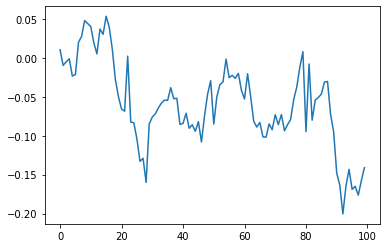

In [44]:
import matplotlib.pyplot as plt
plt.plot(sentiments)

In [65]:
df = pd.DataFrame.from_dict(data)
df["sentiment"] = sentiments

In [66]:
df

,id,responses,tweet,time,sentiment
0,1287755668053790724,[@realDonaldTrump Please look into #Baget thi...,"Texas has a decline in new cases as well, and ...",Mon Jul 27 14:24:11 +0000 2020,0.010449
1,1287755616732229638,[@McNaughtonArt @realDonaldTrump @EricTrump @T...,Arizona shows a directionally nice decline in ...,Mon Jul 27 14:23:59 +0000 2020,-0.009623
2,1287755448960135171,[@Here4Trump2020 @ScottHendrick49 @SpeakerPelo...,Trump critics wrongly mount political attack o...,Mon Jul 27 14:23:19 +0000 2020,-0.005053
3,1287754912919687169,[@Molnar_Politico @realDonaldTrump Michigan 🙌🙌...,A Dubious Order against the Seattle Ban on Pol...,Mon Jul 27 14:21:11 +0000 2020,-0.001142
4,1287754549499920384,[@gerritwin15 @CassandraMeyna1 @BarrettWilson6...,Biased anti-Flynn rogue judge exceeds authorit...,Mon Jul 27 14:19:44 +0000 2020,-0.023378
...,...,...,...,...,...
95,1287366627672166401,"[@realDonaldTrump https://t.co/5irzFfPedu, @ve...",This week you had Joe Biden call Arizona a CIT...,Mon Jul 27 14:24:11 +0000 2020,-0.168873
96,1287251585396023298,[If @realDonaldTrump were a Democrat. https://...,In God We Trust (Part 2) https://t.co/0CGRhXrz26,Sun Jul 26 05:01:08 +0000 2020,-0.165035
97,1287250572949807104,[Antifa might try to burn down polling places ...,Thank you Jon! https://t.co/vWVriDTnDb,Mon Jul 27 14:24:11 +0000 2020,-0.176385
98,1287220358731509762,"[@realDonaldTrump Little involved = ""tear-gass...",https://t.co/Cd0X3e3wy7,Mon Jul 27 14:24:11 +0000 2020,-0.157949


In [75]:
import plotly.express as px
fig = px.line(df, y="sentiment")
# add hover_name="topic"
fig.show()

## Sentiment Change Prediction

In [50]:
from statsmodels.tsa.stattools import ARMA
from statsmodels.tsa.ar_model import AR

In [55]:
train = sentiments[0:90]
test = sentiments[90:-1]

In [57]:
model = AR(train)

In [58]:
model_fit = model.fit(maxlag=10)
predictions = model_fit.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)

In [59]:
predictions

array([-0.06814292, -0.09059395, -0.06677328, -0.06363643, -0.05995536,
       -0.06543302, -0.07772631, -0.07682079, -0.07673554])

In [54]:
test

[-0.14824301075268823,
 -0.16368260869565224,
 -0.2005239130434783,
 -0.16479130434782613,
 -0.1432274725274726,
 -0.16887325581395352,
 -0.1650349397590362,
 -0.1763851851851852,
 -0.1579487804878049]